In [1]:
import torch
from torchgeo.datasets import LoveDA
import torchvision
from tqdm import tqdm

### Read in Data
- For LoveDA one can simply use the LoveDA Dataset class from torchgeo to download the data

In [2]:
path = "../../../../data/LoveDA/"

In [3]:
# Download the dataset if not already downloaded
love_train = LoveDA(
    root=path, 
    split='train', 
    scene=['urban', 'rural'], 
    transforms=None, 
    download=True, 
    checksum=False)

love_val = LoveDA(
    root=path, 
    split='val', 
    scene=['urban', 'rural'], 
    transforms=None, 
    download=True, 
    checksum=False)

print(f"""
      Train data: {len(love_train)}
      Validation data: {len(love_val)}
      """)

Files already downloaded and verified
Files already downloaded and verified

      Train data: 2497
      Validation data: 1669
      


### Plot random instance from the LoveDA dataset with corresponding labels

In [4]:
import random
idx = random.randint(0, len(love_train))

img = love_train[idx]['image'].to(torch.uint8)
mask = love_train[idx]['mask']

In [5]:
RGB_classes = [
       (0, 0, 0), # ignore
       (255, 255, 225), # background
       (255,  0, 255), # building
       (255, 0, 0), # road
       (0,  0,  255), # water
       (128, 128, 128), # barren
       (0, 130, 0), # forest
       (255, 200, 0)] # agriculture
Label_classes = [
       "ignore",
       "background",
       "building",
       "road",
       "water",
       "barren",
       "forest",
       "agriculture"]

idx2label = {key: value for key, value in enumerate(Label_classes)}

# Create a dictionary to translate a mask to a rgb tensor
idx2rgb = {key: value for key, value in enumerate(RGB_classes)}

In [6]:
# Create the RGB tensor
rgb_tensor = torch.zeros((img.shape), dtype=torch.uint8)
for index in idx2rgb:
    for channel, color in enumerate(idx2rgb[index]):
        rgb_tensor[channel][mask == index] = color

In [7]:
# Function to transform tensor to image
transform = torchvision.transforms.ToPILImage()

In [8]:
image = transform(img).convert('RGB')
mask_img = transform(rgb_tensor)

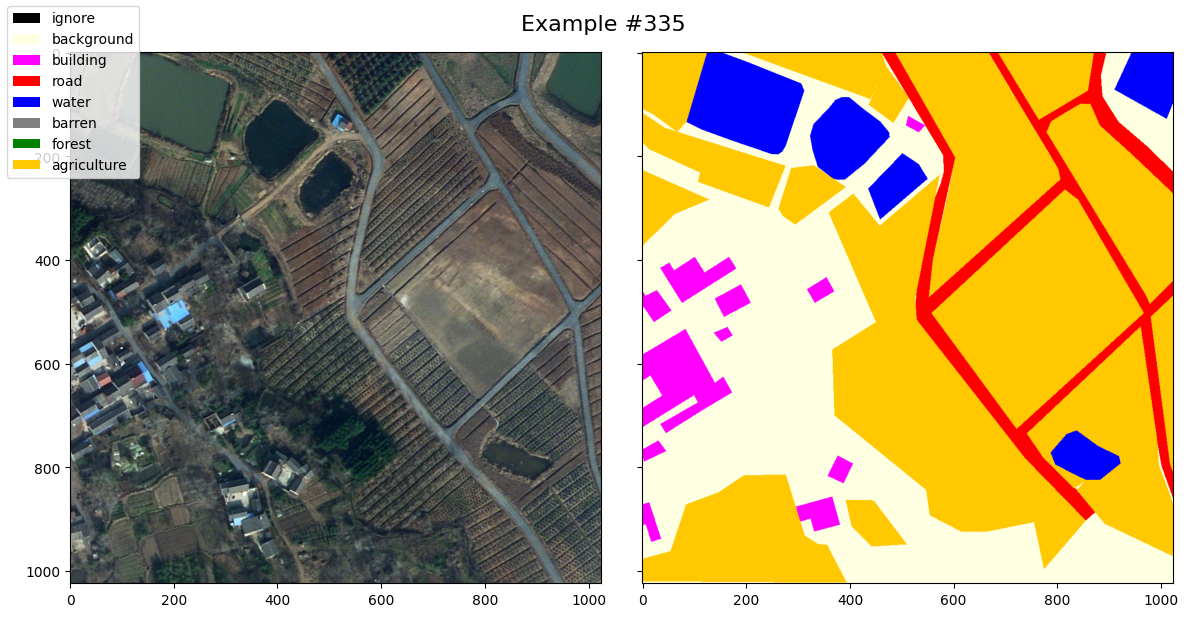

In [9]:
import matplotlib.pyplot as plt
SIZE = 800

im1 = image.resize((SIZE, SIZE))
im2 = mask_img.resize((SIZE, SIZE))

f, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax[0].imshow(image, vmin=0, vmax=255)
ax[1].imshow(mask_img)

f.suptitle(f"Example #{idx}", fontsize=16)

# Extract colors and labels from the dictionary
colors = [(r / 255, g / 255, b / 255, 1) for r, g, b in idx2rgb.values()]
labels = [str(idx2label[key]) for key in idx2rgb]

# Create a legend using the extracted colors and labels
patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
f.legend(patches, labels, loc='upper left')

f.tight_layout()
plt.show()